<font size=4 color='blue'>

# <center> Clase 5, octubre 21 del 2020 </center>

<font size=4 color='blue'>

# <center> Tópico de estudio: Mortalidad por diabetes </center>

<font size=4 color='blue'>
    
## Información sobre el tópico

<font size=4>

Evolución de la diabetes despues de un año.
    
En el presente trabajo, la diabetes la caracterizamos con los siguientes diez rasgos: edad, sexo, índice de masa corporal, presión arterial promedio y seis mediciones de suero sanguíneo (S1, S2, S3, S4, S5, S6).


<font size=4 color='blue'>
    
## Cuantificación de esta información

<font size=4>

Se tienen información de 442 pacientes (m = 442). La respuesta de interés, Y, es una medida cuantitativa de la progresión de la enfermedad un año después del inicio del estudio. Los valores de Y varían entre 25 y 346

Fuente de la información: [diabetes data](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html)    

Artículo original: [Least-Angle-Regression_2004](./Literatura/Least-Angle-Regression_2004.pdf)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
# Los datos se encuentran el el archivo diabetes.csv

df = pd.read_csv('diabetes.csv', sep ='\t')

# se crea el dataframe df, el cual contiene los 10 rasgos relevantes de los pacientes
# diabeticos, así como el progreso (y) de la enfermedad un año después de comenzado el estudio. 

In [3]:
# Se despliegan las primeras 5 muestras (rasgos, objetivo)

df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [4]:
# el método describe() genera una tabla con informacion estadistica de cada uno de los rasgos y del objetivo.

df.describe()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


## Se crean los histogramas para cada uno de los rasgos que caracteriza a los pacientes con diabetes:

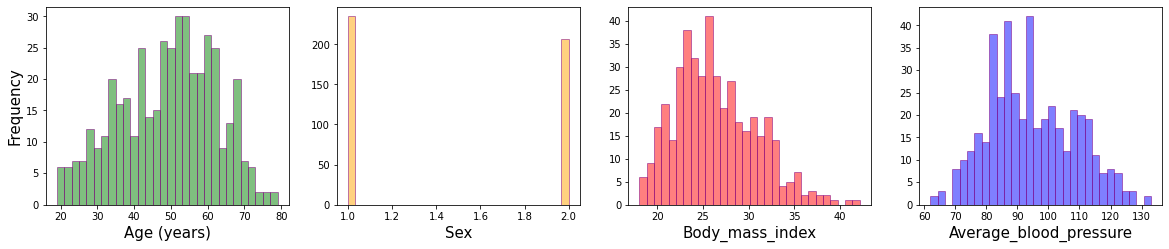

In [5]:
plt.figure(figsize=(20,8)) 

ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)
ax4 = plt.subplot(2,4,4)

ax1.hist(df.AGE, bins=30, color='green',edgecolor='purple', alpha=0.5)
ax1.set_xlabel('Age (years)', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2.hist(df.SEX, bins=30, color='orange',edgecolor='purple', alpha=0.5)
ax2.set_xlabel('Sex', size=15)

ax3.hist(df.BMI, bins=30, color='red',edgecolor='purple', alpha=0.5)
ax3.set_xlabel('Body_mass_index', size=15)

ax4.hist(df.BP, bins=30, color='blue',edgecolor='purple', alpha=0.5)
ax4.set_xlabel('Average_blood_pressure', size=15);

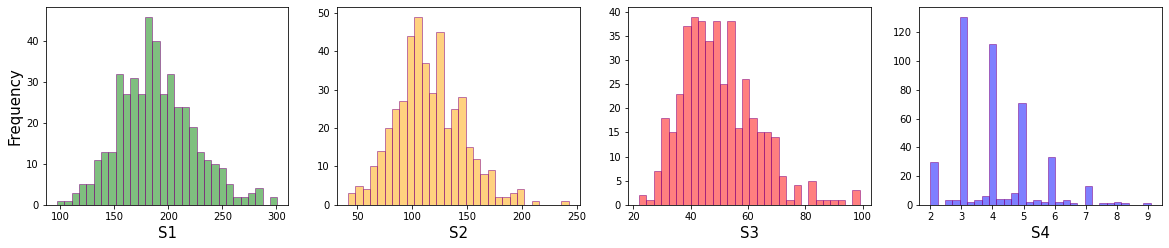

In [6]:
plt.figure(figsize=(20,8)) 

ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)
ax4 = plt.subplot(2,4,4)

ax1.hist(df.S1, bins=30, color='green',edgecolor='purple', alpha=0.5)
ax1.set_xlabel('S1', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2.hist(df.S2, bins=30, color='orange',edgecolor='purple', alpha=0.5)
ax2.set_xlabel('S2', size=15)

ax3.hist(df.S3, bins=30, color='red',edgecolor='purple', alpha=0.5)
ax3.set_xlabel('S3', size=15)

ax4.hist(df.S4, bins=30, color='blue',edgecolor='purple', alpha=0.5)
ax4.set_xlabel('S4', size=15);

Text(0.5, 0, 'Y')

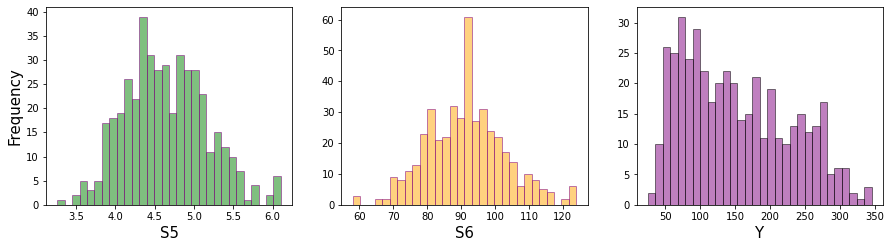

In [7]:
plt.figure(figsize=(15,8)) 

ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)

ax1.hist(df.S5, bins=30, color='green',edgecolor='purple', alpha=0.5)
ax1.set_xlabel('S5', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2.hist(df.S6, bins=30, color='orange',edgecolor='purple', alpha=0.5)
ax2.set_xlabel('S6', size=15)

ax3.hist(df.Y, bins=30, color='purple',edgecolor='black', alpha=0.5)
ax3.set_xlabel('Y', size=15)


<font size=4>

Para quitar cualquier posible correlación entre las muestras (los renglones del DataFrame), estos se reordenan al azar.

In [8]:
df = df.sample(frac=1)

<font size=4>
    
Se dividen la muestras originales en 2 conjuntos: 90 % para el entrenamiento y 10 % para hacer inferencias predicciones) con lo aprendido.

In [9]:
test_ratio = 0.1

train_ratio = int((1.0-test_ratio)*len(df.values[:,:]))

df_train = df.iloc[0:train_ratio,:]
df_test  = df.iloc[train_ratio:,:]

In [10]:
print(df_train.shape)
print(df_test.shape)

(397, 11)
(45, 11)


<font size=4>

Para trabajar con los modelos se requiere que todas las variables tengan el mismo orden de magnitud. Por ello, se normalizan sus valores en las muestras que se van a emplear en el entrenamiento, tanto los rasgos (X) y las objetivo o referencia (Y):

$$x_{norm} = \dfrac{x-\bar{x}}{\sigma}$$

In [11]:
df_train_norm = (df_train - df_train.mean()) / df_train.std()

In [12]:
df_test_norm = (df_test - df_train.mean()) / df_train.std()

<font size=4>
    
Histogramas de las variables que se emplearán en el entrenamiento:

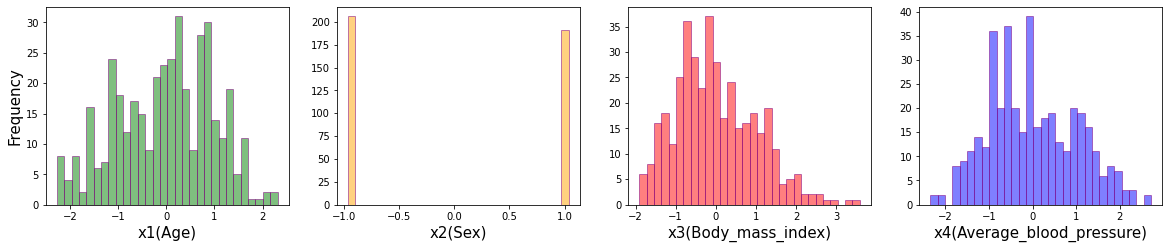

In [13]:
plt.figure(figsize=(20,8)) 

ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)
ax4 = plt.subplot(2,4,4)

ax1.hist(df_train_norm.AGE, bins=30, color='green',edgecolor='purple', alpha=0.5)
ax1.set_xlabel('x1(Age)', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2.hist(df_train_norm.SEX, bins=30, color='orange',edgecolor='purple', alpha=0.5)
ax2.set_xlabel('x2(Sex)', size=15)

ax3.hist(df_train_norm.BMI, bins=30, color='red',edgecolor='purple', alpha=0.5)
ax3.set_xlabel('x3(Body_mass_index)', size=15)

ax4.hist(df_train_norm.BP, bins=30, color='blue',edgecolor='purple', alpha=0.5)
ax4.set_xlabel('x4(Average_blood_pressure)', size=15);

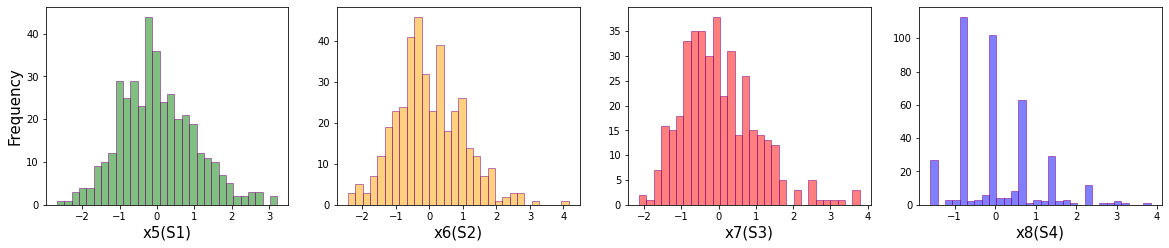

In [14]:
plt.figure(figsize=(20,8)) 

ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)
ax4 = plt.subplot(2,4,4)

ax1.hist(df_train_norm.S1, bins=30, color='green',edgecolor='purple', alpha=0.5)
ax1.set_xlabel('x5(S1)', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2.hist(df_train_norm.S2, bins=30, color='orange',edgecolor='purple', alpha=0.5)
ax2.set_xlabel('x6(S2)', size=15)

ax3.hist(df_train_norm.S3, bins=30, color='red',edgecolor='purple', alpha=0.5)
ax3.set_xlabel('x7(S3)', size=15)

ax4.hist(df_train_norm.S4, bins=30, color='blue',edgecolor='purple', alpha=0.5)
ax4.set_xlabel('x8(S4)', size=15);

Text(0.5, 0, 'Y')

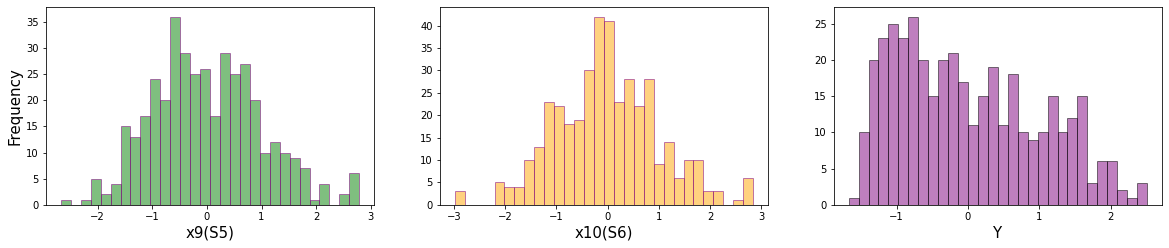

In [15]:
plt.figure(figsize=(20,8)) 

ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)

ax1.hist(df_train_norm.S5, bins=30, color='green',edgecolor='purple', alpha=0.5)
ax1.set_xlabel('x9(S5)', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2.hist(df_train_norm.S6, bins=30, color='orange',edgecolor='purple', alpha=0.5)
ax2.set_xlabel('x10(S6)', size=15)

ax3.hist(df_train_norm.Y, bins=30, color='purple',edgecolor='black', alpha=0.5)
ax3.set_xlabel('Y', size=15)


<font size=4>
Los valores de las variables X e Y se extraen de las columnas del DataFrame.

In [16]:
train_x = df_train_norm.values[:,:-1]
train_y = df_train_norm.values[:,-1:]

In [17]:
test_x = df_test_norm.values[:,:-1]
test_y = df_test_norm.values[:,-1:]

In [18]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(397, 10)
(397, 1)
(45, 10)
(45, 1)


<font size=5 color='blue'>

# <center> Artificial Neural Networks </center>




<font size=4 color='blue'>

# <center> Implemented using the framework Keras </center>


<font size=4 color='mediumvioletred'>
   
[Keras](https://keras.io/)

In [19]:
from keras.models import Sequential
from keras.layers import Input, Dense, Flatten
from keras.layers import Activation
from keras.optimizers import SGD
from keras.models import Model
from keras.utils import plot_model
from keras import initializers
from keras import optimizers
import tensorflow as tf

Using TensorFlow backend.


<font size=5 color='blue'>

Generating a full-connected feedforward (FFF) artificial neural network.

In [20]:
import networkx as nx

class Network(object):
    
    def  __init__ (self,sizes):
        self.num_layers = len(sizes)
        print("It has", self.num_layers, "layers,")
        self.sizes = sizes
        print("with the following number of nodes per layer",self.sizes)
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x)
                        for x, y in zip(sizes[:-1], sizes[1:])]
        
    def feedforward(self, x_of_sample):
        """Return the output of the network F(x_of_sample) """        
        for b, w in zip(self.biases, self.weights):
            x_of_sample = sigmoid(np.dot(w, x_of_sample)+b)
        return x_of_sample
    
    def graph(self,sizes):
        a=[]
        ps={}
        Q = nx.Graph()
        for i in range(len(sizes)):
            Qi=nx.Graph()    
            n=sizes[i]
            nodos=np.arange(n)
            Qi.add_nodes_from(nodos)
            l_i=Qi.nodes
            Q = nx.union(Q, Qi, rename = (None, 'Q%i-'%i))
            if len(l_i)==1:
                ps['Q%i-0'%i]=[i/(len(sizes)), 1/2]
            else:
                for j in range(len(l_i)+1):
                    ps['Q%i-%i'%(i,j)]=[i/(len(sizes)),(1/(len(l_i)*len(l_i)))+(j/(len(l_i)))]
            a.insert(i,Qi)
        for i in range(len(a)-1):
            for j in range(len(a[i])):
                for k in range(len(a[i+1])):
                    Q.add_edge('Q%i-%i' %(i,j),'Q%i-%i' %(i+1,k))
        nx.draw(Q, pos = ps)
                

It has 3 layers,
with the following number of nodes per layer [10, 4, 1]


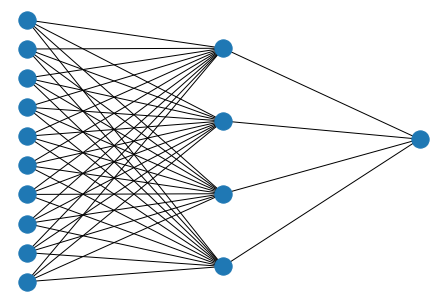

In [21]:
n_x = train_x.shape[1] 
n_h = 4
n_y = train_y.shape[1]
    
layers = [n_x, n_h, n_y]
net = Network(layers)
net.graph(layers)

<font size=5 color='blue'>
    
Architecture definition. 
    
It includes weights and biases initialization, as well as the activation functions.

In [22]:

model = Sequential()

input_nodes = n_x     #input layer has n_x nodes
hlayer1_nodes = n_h   #first hidden layer has n_h nodes
output_nodes = n_y    #output layer has n_y node


#For the first hidden layer, it is necessary to indicate its input layer, which corresponds to 
#the input layer of the network

model.add(Dense(hlayer1_nodes,  kernel_initializer='uniform', bias_initializer='zeros', input_dim=input_nodes, activation='tanh'))

#For any other hidden layer its input layer is not indicated. Its input layer is the hidden layer before it

#The following layer is the last layer of the network. It corresponds to the output layer of the network
model.add(Dense(output_nodes, kernel_initializer='uniform', bias_initializer='zeros', activation='linear'))


<font size=5 color='blue'>
Graph and summary of the architecture

In [24]:
plot_model(model, to_file='model.png', show_shapes=True, rankdir='TB', 
       show_layer_names=True)

ImportError: Failed to import `pydot`. Please install `pydot`. For example with `pip install pydot`.

In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 44        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


<font size=5  color='blue'>
    
Compiling the model. It includes the definition of the optimizer

In [26]:
# We define the optimizing function and their hyperparameters: learining rate(lr) in the present case

sgd = optimizers.SGD(lr=0.01)

# For this optimizer there are more hyperparameters availble. See the respective reference
# for example, 
# sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(loss='mean_squared_error', optimizer=sgd)

<font size=5 color='blue'>
    
Training the learning system

In [27]:
#10 % of the data for training will be used to validate the training
validation_portion = 0.1
epochs = 100

history = model.fit(train_x, train_y, epochs=epochs, validation_split = validation_portion)

# the object "history" contains information generated during the training



Train on 357 samples, validate on 40 samples
Epoch 1/100
357/357 [==============================] - 6s 18ms/step - loss: 1.0227 - val_loss: 0.7920
Epoch 2/100
357/357 [==============================] - 0s 128us/step - loss: 1.0189 - val_loss: 0.7885
Epoch 3/100
357/357 [==============================] - 0s 28us/step - loss: 1.0134 - val_loss: 0.7845
Epoch 4/100
357/357 [==============================] - 0s 70us/step - loss: 1.0055 - val_loss: 0.7777
Epoch 5/100
357/357 [==============================] - 0s 56us/step - loss: 0.9933 - val_loss: 0.7685
Epoch 6/100
357/357 [==============================] - 0s 31us/step - loss: 0.9740 - val_loss: 0.7536
Epoch 7/100
357/357 [==============================] - 0s 31us/step - loss: 0.9466 - val_loss: 0.7323
Epoch 8/100
357/357 [==============================] - 0s 42us/step - loss: 0.9080 - val_loss: 0.7061
Epoch 9/100
357/357 [==============================] - 0s 42us/step - loss: 0.8608 - val_loss: 0.6710
Epoch 10/100
357/357 [============

357/357 [==============================] - 0s 25us/step - loss: 0.4731 - val_loss: 0.5769
Epoch 77/100
357/357 [==============================] - 0s 42us/step - loss: 0.4730 - val_loss: 0.5788
Epoch 78/100
357/357 [==============================] - 0s 31us/step - loss: 0.4742 - val_loss: 0.5706
Epoch 79/100
357/357 [==============================] - 0s 39us/step - loss: 0.4732 - val_loss: 0.5634
Epoch 80/100
357/357 [==============================] - 0s 25us/step - loss: 0.4736 - val_loss: 0.5675
Epoch 81/100
357/357 [==============================] - 0s 31us/step - loss: 0.4733 - val_loss: 0.5655
Epoch 82/100
357/357 [==============================] - 0s 25us/step - loss: 0.4730 - val_loss: 0.5672
Epoch 83/100
357/357 [==============================] - 0s 31us/step - loss: 0.4724 - val_loss: 0.5641
Epoch 84/100
357/357 [==============================] - 0s 25us/step - loss: 0.4729 - val_loss: 0.5620
Epoch 85/100
357/357 [==============================] - 0s 56us/step - loss: 0.4735 - 

<font size=5 color='blue'>

Plots of the costs functions versus epoch    

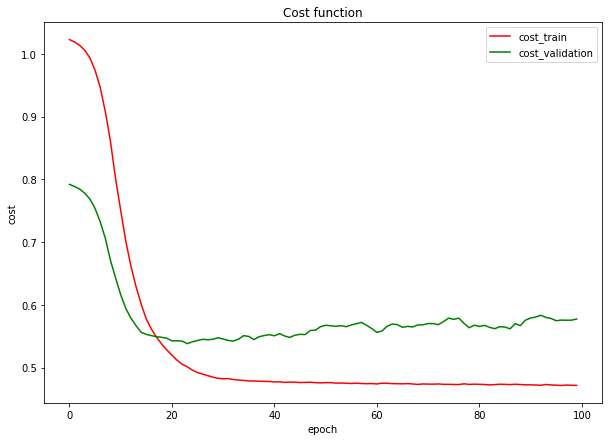

In [28]:
plt.figure(figsize=(10, 7))

plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='green')
plt.title('Cost function')
plt.ylabel('cost')
plt.xlabel('epoch')
plt.legend(['cost_train', 'cost_validation'])
plt.show()


In [ ]:
#history_model.history

<font size = 5 color = 'blue'>
    
Evaluation of the learning. 
    
This is done using the test data.

In [29]:
preds = model.evaluate(x=test_x, y=test_y)

print ("Loss = " + str(preds))

45/45 [==============================] - 0s 66us/step
Loss = 0.5443283398946126


In [30]:
prediction = model.predict(test_x)

In [31]:
prediction[0]

array([-1.102814], dtype=float32)